In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import itertools
import solar_sensor_env
import pandas as pd

In [2]:
import simple_solar_env
import gym
from gym.envs.registration import registry, register, make, spec
solarfname = 'testing'
solarrecord = solar_sensor_env.get_generated_power(solarfname)
register(id='SolarSensor-v0',
        entry_point='solar_sensor_env:SolarSensorEnv',
        kwargs = {'max_batt':100,'num_sensors':4, 'solarpowerrecord':solarrecord}
        )
env = gym.make('SolarSensor-v0')

In [3]:
def wrap_action(sensornum, actionnum):
    return (sensornum,actionnum)

def find_active(observation):
    #if any sensor is active return the sensorname
    #else return None
    active_sensor = [k for k,v in observation.items() if v[0]==0]
    assert len(active_sensor)<=1
    return active_sensor
    
class SimpleNetworkAgent(object):
    """The world's simplest agent!"""
    def __init__(self, env,n_episodes=1, max_env_steps = int(365*24/0.5)):
        self.env = env
        self.n_episodes = n_episodes
        if max_env_steps is not None: self.env._max_episode_steps = max_env_steps
        self.full_record = []
    def act(self, observation):
        #recharge if battery gets below 3 
        # status 0: On 1: PreSleep 2: Sleep
        active_sensors = find_active(observation)
        if active_sensors:
            sensor = active_sensors[0]
            sensorname, sensornum = sensor
            status, battery, diff, t = observation[sensor]
            actionnum = 1 if battery <3 else 0
            wrapped_action = wrap_action(int(sensornum), actionnum)
        else:
            sleepingsensors = [(k,v) for k,v in observation.items() if v[0]==2]
            maxbattsensor = max(sleepingsensors, key = lambda s: s[1][1])
            sensornum = int(maxbattsensor[0][1])
            wrapped_action = wrap_action(sensornum, 0)#wakeup
        return wrapped_action
    def run(self, render=True):
        for e in range(self.n_episodes):
            print('#######New episode#############')
            done=False
            observation = self.env.reset()
            reward_sum = 0
            i=0
            while not done and i<self.env._max_episode_steps:
                if render: self.env.render()
                action = agent.act(observation)
                print('observation:{}, action:{}'.format(observation, action))
                observation, reward, done, info = self.env.step(action)
                print('new observation:{}, reward:{}'.format(observation, reward))
                reward_sum += reward
                i+=1
            print("episode: {}/{}, score: {}".format(e, self.n_episodes, reward_sum))
            self.full_record.append(self.env.record)
        return e

In [4]:
agent = SimpleNetworkAgent(env)
agent.run()

#######New episode#############
reward: /home/jjlong/continuous/tmp/rewarddlzgd.json
observation:{'S0': (0, 100, 0, 0), 'S2': (2, 100, 0, 0), 'S3': (2, 100, 0, 0), 'S1': (2, 100, 0, 0)}, action:(0, 0)
new observation:{'S0': (0, 97, -3, 1), 'S2': (2, 99, -1, 1), 'S3': (2, 99, -1, 1), 'S1': (2, 99, -1, 1)}, reward:1
observation:{'S0': (0, 97, -3, 1), 'S2': (2, 99, -1, 1), 'S3': (2, 99, -1, 1), 'S1': (2, 99, -1, 1)}, action:(0, 0)
new observation:{'S0': (0, 94, -3, 2), 'S2': (2, 98, -1, 2), 'S3': (2, 98, -1, 2), 'S1': (2, 98, -1, 2)}, reward:1
observation:{'S0': (0, 94, -3, 2), 'S2': (2, 98, -1, 2), 'S3': (2, 98, -1, 2), 'S1': (2, 98, -1, 2)}, action:(0, 0)
new observation:{'S0': (0, 91, -3, 3), 'S2': (2, 97, -1, 3), 'S3': (2, 97, -1, 3), 'S1': (2, 97, -1, 3)}, reward:1
observation:{'S0': (0, 91, -3, 3), 'S2': (2, 97, -1, 3), 'S3': (2, 97, -1, 3), 'S1': (2, 97, -1, 3)}, action:(0, 0)
new observation:{'S0': (0, 88, -3, 4), 'S2': (2, 96, -1, 4), 'S3': (2, 96, -1, 4), 'S1': (2, 96, -1, 4)}, 

new observation:{'S0': (1, 0, 0, 47), 'S2': (2, 0, 0, 47), 'S3': (2, 0, 0, 47), 'S1': (2, 0, 0, 47)}, reward:0
observation:{'S0': (1, 0, 0, 47), 'S2': (2, 0, 0, 47), 'S3': (2, 0, 0, 47), 'S1': (2, 0, 0, 47)}, action:(2, 0)
new observation:{'S0': (2, 0, 0, 0), 'S2': (0, 0, 0, 0), 'S3': (2, 0, 0, 0), 'S1': (2, 0, 0, 0)}, reward:0
observation:{'S0': (2, 0, 0, 0), 'S2': (0, 0, 0, 0), 'S3': (2, 0, 0, 0), 'S1': (2, 0, 0, 0)}, action:(2, 1)
new observation:{'S0': (2, 0, 0, 1), 'S2': (1, 0, 0, 1), 'S3': (2, 0, 0, 1), 'S1': (2, 0, 0, 1)}, reward:0
observation:{'S0': (2, 0, 0, 1), 'S2': (1, 0, 0, 1), 'S3': (2, 0, 0, 1), 'S1': (2, 0, 0, 1)}, action:(0, 0)
new observation:{'S0': (0, 0, 0, 2), 'S2': (2, 0, 0, 2), 'S3': (2, 0, 0, 2), 'S1': (2, 0, 0, 2)}, reward:0
observation:{'S0': (0, 0, 0, 2), 'S2': (2, 0, 0, 2), 'S3': (2, 0, 0, 2), 'S1': (2, 0, 0, 2)}, action:(0, 1)
new observation:{'S0': (1, 0, 0, 3), 'S2': (2, 0, 0, 3), 'S3': (2, 0, 0, 3), 'S1': (2, 0, 0, 3)}, reward:0
observation:{'S0': (1, 0,

new observation:{'S0': (2, 12, -1, 15), 'S2': (0, 1, -3, 15), 'S3': (2, 14, -1, 15), 'S1': (2, 0, 0, 15)}, reward:0
observation:{'S0': (2, 12, -1, 15), 'S2': (0, 1, -3, 15), 'S3': (2, 14, -1, 15), 'S1': (2, 0, 0, 15)}, action:(2, 1)
new observation:{'S0': (2, 11, -1, 16), 'S2': (1, 0, -1, 16), 'S3': (2, 13, -1, 16), 'S1': (2, 0, 0, 16)}, reward:0
observation:{'S0': (2, 11, -1, 16), 'S2': (1, 0, -1, 16), 'S3': (2, 13, -1, 16), 'S1': (2, 0, 0, 16)}, action:(3, 0)
new observation:{'S0': (2, 10, -1, 17), 'S2': (2, 0, 0, 17), 'S3': (0, 12, -1, 17), 'S1': (2, 0, 0, 17)}, reward:0
observation:{'S0': (2, 10, -1, 17), 'S2': (2, 0, 0, 17), 'S3': (0, 12, -1, 17), 'S1': (2, 0, 0, 17)}, action:(3, 0)
new observation:{'S0': (2, 10, 0, 18), 'S2': (2, 0, 0, 18), 'S3': (0, 9, -3, 18), 'S1': (2, 0, 0, 18)}, reward:0
observation:{'S0': (2, 10, 0, 18), 'S2': (2, 0, 0, 18), 'S3': (0, 9, -3, 18), 'S1': (2, 0, 0, 18)}, action:(3, 0)
new observation:{'S0': (2, 9, -1, 19), 'S2': (2, 0, 0, 19), 'S3': (0, 6, -3,

observation:{'S0': (2, 26, 4, 20), 'S2': (2, 22, 6, 20), 'S3': (2, 35, 6, 20), 'S1': (0, 11, 2, 20)}, action:(1, 0)
new observation:{'S0': (2, 26, 0, 21), 'S2': (2, 22, 0, 21), 'S3': (2, 35, 0, 21), 'S1': (0, 9, -2, 21)}, reward:1
observation:{'S0': (2, 26, 0, 21), 'S2': (2, 22, 0, 21), 'S3': (2, 35, 0, 21), 'S1': (0, 9, -2, 21)}, action:(1, 0)
new observation:{'S0': (2, 26, 0, 22), 'S2': (2, 22, 0, 22), 'S3': (2, 35, 0, 22), 'S1': (0, 6, -3, 22)}, reward:1
observation:{'S0': (2, 26, 0, 22), 'S2': (2, 22, 0, 22), 'S3': (2, 35, 0, 22), 'S1': (0, 6, -3, 22)}, action:(1, 0)
new observation:{'S0': (2, 26, 0, 23), 'S2': (2, 22, 0, 23), 'S3': (2, 35, 0, 23), 'S1': (0, 4, -2, 23)}, reward:1
observation:{'S0': (2, 26, 0, 23), 'S2': (2, 22, 0, 23), 'S3': (2, 35, 0, 23), 'S1': (0, 4, -2, 23)}, action:(1, 0)
new observation:{'S0': (2, 27, 1, 24), 'S2': (2, 23, 1, 24), 'S3': (2, 36, 1, 24), 'S1': (0, 2, -2, 24)}, reward:1
observation:{'S0': (2, 27, 1, 24), 'S2': (2, 23, 1, 24), 'S3': (2, 36, 1, 24

new observation:{'S0': (2, 60, -1, 38), 'S2': (2, 19, -1, 38), 'S3': (2, 74, -1, 38), 'S1': (0, 45, -3, 38)}, reward:1
observation:{'S0': (2, 60, -1, 38), 'S2': (2, 19, -1, 38), 'S3': (2, 74, -1, 38), 'S1': (0, 45, -3, 38)}, action:(1, 0)
new observation:{'S0': (2, 59, -1, 39), 'S2': (2, 18, -1, 39), 'S3': (2, 73, -1, 39), 'S1': (0, 42, -3, 39)}, reward:1
observation:{'S0': (2, 59, -1, 39), 'S2': (2, 18, -1, 39), 'S3': (2, 73, -1, 39), 'S1': (0, 42, -3, 39)}, action:(1, 0)
new observation:{'S0': (2, 58, -1, 40), 'S2': (2, 17, -1, 40), 'S3': (2, 72, -1, 40), 'S1': (0, 39, -3, 40)}, reward:1
observation:{'S0': (2, 58, -1, 40), 'S2': (2, 17, -1, 40), 'S3': (2, 72, -1, 40), 'S1': (0, 39, -3, 40)}, action:(1, 0)
new observation:{'S0': (2, 57, -1, 41), 'S2': (2, 16, -1, 41), 'S3': (2, 71, -1, 41), 'S1': (0, 36, -3, 41)}, reward:1
observation:{'S0': (2, 57, -1, 41), 'S2': (2, 16, -1, 41), 'S3': (2, 71, -1, 41), 'S1': (0, 36, -3, 41)}, action:(1, 0)
new observation:{'S0': (2, 56, -1, 42), 'S2'

new observation:{'S0': (0, 12, -3, 47), 'S2': (2, 44, -1, 47), 'S3': (2, 85, -1, 47), 'S1': (2, 85, -1, 47)}, reward:1
observation:{'S0': (0, 12, -3, 47), 'S2': (2, 44, -1, 47), 'S3': (2, 85, -1, 47), 'S1': (2, 85, -1, 47)}, action:(0, 0)
new observation:{'S0': (0, 9, -3, 0), 'S2': (2, 43, -1, 0), 'S3': (2, 84, -1, 0), 'S1': (2, 84, -1, 0)}, reward:1
observation:{'S0': (0, 9, -3, 0), 'S2': (2, 43, -1, 0), 'S3': (2, 84, -1, 0), 'S1': (2, 84, -1, 0)}, action:(0, 0)
new observation:{'S0': (0, 6, -3, 1), 'S2': (2, 42, -1, 1), 'S3': (2, 83, -1, 1), 'S1': (2, 83, -1, 1)}, reward:1
observation:{'S0': (0, 6, -3, 1), 'S2': (2, 42, -1, 1), 'S3': (2, 83, -1, 1), 'S1': (2, 83, -1, 1)}, action:(0, 0)
new observation:{'S0': (0, 3, -3, 2), 'S2': (2, 41, -1, 2), 'S3': (2, 82, -1, 2), 'S1': (2, 82, -1, 2)}, reward:1
observation:{'S0': (0, 3, -3, 2), 'S2': (2, 41, -1, 2), 'S3': (2, 82, -1, 2), 'S1': (2, 82, -1, 2)}, action:(0, 0)
new observation:{'S0': (0, 0, -3, 3), 'S2': (2, 40, -1, 3), 'S3': (2, 81, 

observation:{'S0': (0, 49, -3, 12), 'S2': (2, 44, -1, 12), 'S3': (2, 0, 0, 12), 'S1': (2, 55, -1, 12)}, action:(0, 0)
new observation:{'S0': (0, 46, -3, 13), 'S2': (2, 43, -1, 13), 'S3': (2, 0, 0, 13), 'S1': (2, 54, -1, 13)}, reward:0
observation:{'S0': (0, 46, -3, 13), 'S2': (2, 43, -1, 13), 'S3': (2, 0, 0, 13), 'S1': (2, 54, -1, 13)}, action:(0, 0)
new observation:{'S0': (0, 43, -3, 14), 'S2': (2, 42, -1, 14), 'S3': (2, 0, 0, 14), 'S1': (2, 53, -1, 14)}, reward:0
observation:{'S0': (0, 43, -3, 14), 'S2': (2, 42, -1, 14), 'S3': (2, 0, 0, 14), 'S1': (2, 53, -1, 14)}, action:(0, 0)
new observation:{'S0': (0, 43, 0, 15), 'S2': (2, 44, 2, 15), 'S3': (2, 2, 2, 15), 'S1': (2, 55, 2, 15)}, reward:0
observation:{'S0': (0, 43, 0, 15), 'S2': (2, 44, 2, 15), 'S3': (2, 2, 2, 15), 'S1': (2, 55, 2, 15)}, action:(0, 0)
new observation:{'S0': (0, 45, 2, 16), 'S2': (2, 47, 3, 16), 'S3': (2, 6, 4, 16), 'S1': (2, 59, 4, 16)}, reward:1
observation:{'S0': (0, 45, 2, 16), 'S2': (2, 47, 3, 16), 'S3': (2, 6,

observation:{'S0': (2, 30, -1, 13), 'S2': (0, 19, -3, 13), 'S3': (2, 9, -1, 13), 'S1': (2, 0, 0, 13)}, action:(2, 0)
new observation:{'S0': (2, 29, -1, 14), 'S2': (0, 16, -3, 14), 'S3': (2, 8, -1, 14), 'S1': (2, 0, 0, 14)}, reward:0
observation:{'S0': (2, 29, -1, 14), 'S2': (0, 16, -3, 14), 'S3': (2, 8, -1, 14), 'S1': (2, 0, 0, 14)}, action:(2, 0)
new observation:{'S0': (2, 28, -1, 15), 'S2': (0, 13, -3, 15), 'S3': (2, 7, -1, 15), 'S1': (2, 0, 0, 15)}, reward:0
observation:{'S0': (2, 28, -1, 15), 'S2': (0, 13, -3, 15), 'S3': (2, 7, -1, 15), 'S1': (2, 0, 0, 15)}, action:(2, 0)
new observation:{'S0': (2, 27, -1, 16), 'S2': (0, 10, -3, 16), 'S3': (2, 7, 0, 16), 'S1': (2, 0, 0, 16)}, reward:0
observation:{'S0': (2, 27, -1, 16), 'S2': (0, 10, -3, 16), 'S3': (2, 7, 0, 16), 'S1': (2, 0, 0, 16)}, action:(2, 0)
new observation:{'S0': (2, 27, 0, 17), 'S2': (0, 8, -2, 17), 'S3': (2, 7, 0, 17), 'S1': (2, 0, 0, 17)}, reward:0
observation:{'S0': (2, 27, 0, 17), 'S2': (0, 8, -2, 17), 'S3': (2, 7, 0, 

new observation:{'S0': (0, 55, -1, 14), 'S2': (2, 73, 1, 14), 'S3': (2, 1, 1, 14), 'S1': (2, 68, 1, 14)}, reward:0
observation:{'S0': (0, 55, -1, 14), 'S2': (2, 73, 1, 14), 'S3': (2, 1, 1, 14), 'S1': (2, 68, 1, 14)}, action:(0, 0)
new observation:{'S0': (0, 56, 1, 15), 'S2': (2, 76, 3, 15), 'S3': (2, 3, 2, 15), 'S1': (2, 71, 3, 15)}, reward:1
observation:{'S0': (0, 56, 1, 15), 'S2': (2, 76, 3, 15), 'S3': (2, 3, 2, 15), 'S1': (2, 71, 3, 15)}, action:(0, 0)
new observation:{'S0': (0, 55, -1, 16), 'S2': (2, 77, 1, 16), 'S3': (2, 4, 1, 16), 'S1': (2, 72, 1, 16)}, reward:1
observation:{'S0': (0, 55, -1, 16), 'S2': (2, 77, 1, 16), 'S3': (2, 4, 1, 16), 'S1': (2, 72, 1, 16)}, action:(0, 0)
new observation:{'S0': (0, 53, -2, 17), 'S2': (2, 77, 0, 17), 'S3': (2, 4, 0, 17), 'S1': (2, 72, 0, 17)}, reward:1
observation:{'S0': (0, 53, -2, 17), 'S2': (2, 77, 0, 17), 'S3': (2, 4, 0, 17), 'S1': (2, 72, 0, 17)}, action:(0, 0)
new observation:{'S0': (0, 50, -3, 18), 'S2': (2, 76, -1, 18), 'S3': (2, 3, -1

new observation:{'S0': (0, 60, -3, 38), 'S2': (2, 93, -1, 38), 'S3': (2, 63, -1, 38), 'S1': (2, 94, -1, 38)}, reward:1
observation:{'S0': (0, 60, -3, 38), 'S2': (2, 93, -1, 38), 'S3': (2, 63, -1, 38), 'S1': (2, 94, -1, 38)}, action:(0, 0)
new observation:{'S0': (0, 57, -3, 39), 'S2': (2, 92, -1, 39), 'S3': (2, 62, -1, 39), 'S1': (2, 93, -1, 39)}, reward:1
observation:{'S0': (0, 57, -3, 39), 'S2': (2, 92, -1, 39), 'S3': (2, 62, -1, 39), 'S1': (2, 93, -1, 39)}, action:(0, 0)
new observation:{'S0': (0, 54, -3, 40), 'S2': (2, 91, -1, 40), 'S3': (2, 61, -1, 40), 'S1': (2, 92, -1, 40)}, reward:1
observation:{'S0': (0, 54, -3, 40), 'S2': (2, 91, -1, 40), 'S3': (2, 61, -1, 40), 'S1': (2, 92, -1, 40)}, action:(0, 0)
new observation:{'S0': (0, 51, -3, 41), 'S2': (2, 90, -1, 41), 'S3': (2, 60, -1, 41), 'S1': (2, 91, -1, 41)}, reward:1
observation:{'S0': (0, 51, -3, 41), 'S2': (2, 90, -1, 41), 'S3': (2, 60, -1, 41), 'S1': (2, 91, -1, 41)}, action:(0, 0)
new observation:{'S0': (0, 48, -3, 42), 'S2'

new observation:{'S0': (2, 97, 7, 17), 'S2': (0, 27, 5, 17), 'S3': (2, 87, 5, 17), 'S1': (2, 92, 6, 17)}, reward:1
observation:{'S0': (2, 97, 7, 17), 'S2': (0, 27, 5, 17), 'S3': (2, 87, 5, 17), 'S1': (2, 92, 6, 17)}, action:(2, 0)
new observation:{'S0': (2, 100, 3, 18), 'S2': (0, 33, 6, 18), 'S3': (2, 92, 5, 18), 'S1': (2, 98, 6, 18)}, reward:1
observation:{'S0': (2, 100, 3, 18), 'S2': (0, 33, 6, 18), 'S3': (2, 92, 5, 18), 'S1': (2, 98, 6, 18)}, action:(2, 0)
new observation:{'S0': (2, 100, 0, 19), 'S2': (0, 39, 6, 19), 'S3': (2, 98, 6, 19), 'S1': (2, 100, 2, 19)}, reward:1
observation:{'S0': (2, 100, 0, 19), 'S2': (0, 39, 6, 19), 'S3': (2, 98, 6, 19), 'S1': (2, 100, 2, 19)}, action:(2, 0)
new observation:{'S0': (2, 100, 0, 20), 'S2': (0, 45, 6, 20), 'S3': (2, 100, 2, 20), 'S1': (2, 100, 0, 20)}, reward:1
observation:{'S0': (2, 100, 0, 20), 'S2': (0, 45, 6, 20), 'S3': (2, 100, 2, 20), 'S1': (2, 100, 0, 20)}, action:(2, 0)
new observation:{'S0': (2, 100, 0, 21), 'S2': (0, 52, 7, 21), 'S

observation:{'S0': (2, 99, -1, 36), 'S2': (2, 98, -1, 36), 'S3': (0, 70, -3, 36), 'S1': (2, 99, -1, 36)}, action:(3, 0)
new observation:{'S0': (2, 98, -1, 37), 'S2': (2, 97, -1, 37), 'S3': (0, 67, -3, 37), 'S1': (2, 98, -1, 37)}, reward:1
observation:{'S0': (2, 98, -1, 37), 'S2': (2, 97, -1, 37), 'S3': (0, 67, -3, 37), 'S1': (2, 98, -1, 37)}, action:(3, 0)
new observation:{'S0': (2, 97, -1, 38), 'S2': (2, 96, -1, 38), 'S3': (0, 64, -3, 38), 'S1': (2, 97, -1, 38)}, reward:1
observation:{'S0': (2, 97, -1, 38), 'S2': (2, 96, -1, 38), 'S3': (0, 64, -3, 38), 'S1': (2, 97, -1, 38)}, action:(3, 0)
new observation:{'S0': (2, 96, -1, 39), 'S2': (2, 95, -1, 39), 'S3': (0, 61, -3, 39), 'S1': (2, 96, -1, 39)}, reward:1
observation:{'S0': (2, 96, -1, 39), 'S2': (2, 95, -1, 39), 'S3': (0, 61, -3, 39), 'S1': (2, 96, -1, 39)}, action:(3, 0)
new observation:{'S0': (2, 95, -1, 40), 'S2': (2, 94, -1, 40), 'S3': (0, 58, -3, 40), 'S1': (2, 95, -1, 40)}, reward:1
observation:{'S0': (2, 95, -1, 40), 'S2': (2

new observation:{'S0': (2, 91, 2, 31), 'S2': (2, 100, 0, 31), 'S3': (0, 59, 0, 31), 'S1': (2, 83, 2, 31)}, reward:1
observation:{'S0': (2, 91, 2, 31), 'S2': (2, 100, 0, 31), 'S3': (0, 59, 0, 31), 'S1': (2, 83, 2, 31)}, action:(3, 0)
new observation:{'S0': (2, 92, 1, 32), 'S2': (2, 100, 0, 32), 'S3': (0, 58, -1, 32), 'S1': (2, 84, 1, 32)}, reward:1
observation:{'S0': (2, 92, 1, 32), 'S2': (2, 100, 0, 32), 'S3': (0, 58, -1, 32), 'S1': (2, 84, 1, 32)}, action:(3, 0)
new observation:{'S0': (2, 92, 0, 33), 'S2': (2, 100, 0, 33), 'S3': (0, 56, -2, 33), 'S1': (2, 84, 0, 33)}, reward:1
observation:{'S0': (2, 92, 0, 33), 'S2': (2, 100, 0, 33), 'S3': (0, 56, -2, 33), 'S1': (2, 84, 0, 33)}, action:(3, 0)
new observation:{'S0': (2, 92, 0, 34), 'S2': (2, 100, 0, 34), 'S3': (0, 53, -3, 34), 'S1': (2, 84, 0, 34)}, reward:1
observation:{'S0': (2, 92, 0, 34), 'S2': (2, 100, 0, 34), 'S3': (0, 53, -3, 34), 'S1': (2, 84, 0, 34)}, action:(3, 0)
new observation:{'S0': (2, 92, 0, 35), 'S2': (2, 100, 0, 35), 

new observation:{'S0': (0, 6, -3, 6), 'S2': (2, 71, -1, 6), 'S3': (2, 0, 0, 6), 'S1': (2, 64, -1, 6)}, reward:0
observation:{'S0': (0, 6, -3, 6), 'S2': (2, 71, -1, 6), 'S3': (2, 0, 0, 6), 'S1': (2, 64, -1, 6)}, action:(0, 0)
new observation:{'S0': (0, 3, -3, 7), 'S2': (2, 70, -1, 7), 'S3': (2, 0, 0, 7), 'S1': (2, 63, -1, 7)}, reward:0
observation:{'S0': (0, 3, -3, 7), 'S2': (2, 70, -1, 7), 'S3': (2, 0, 0, 7), 'S1': (2, 63, -1, 7)}, action:(0, 0)
new observation:{'S0': (0, 0, -3, 8), 'S2': (2, 69, -1, 8), 'S3': (2, 0, 0, 8), 'S1': (2, 62, -1, 8)}, reward:0
observation:{'S0': (0, 0, -3, 8), 'S2': (2, 69, -1, 8), 'S3': (2, 0, 0, 8), 'S1': (2, 62, -1, 8)}, action:(0, 1)
new observation:{'S0': (1, 0, 0, 9), 'S2': (2, 68, -1, 9), 'S3': (2, 0, 0, 9), 'S1': (2, 61, -1, 9)}, reward:0
observation:{'S0': (1, 0, 0, 9), 'S2': (2, 68, -1, 9), 'S3': (2, 0, 0, 9), 'S1': (2, 61, -1, 9)}, action:(2, 0)
new observation:{'S0': (2, 0, 0, 10), 'S2': (0, 67, -1, 10), 'S3': (2, 0, 0, 10), 'S1': (2, 60, -1, 10

new observation:{'S0': (2, 0, 0, 8), 'S2': (2, 0, 0, 8), 'S3': (0, 63, -3, 8), 'S1': (2, 61, -1, 8)}, reward:0
observation:{'S0': (2, 0, 0, 8), 'S2': (2, 0, 0, 8), 'S3': (0, 63, -3, 8), 'S1': (2, 61, -1, 8)}, action:(3, 0)
new observation:{'S0': (2, 0, 0, 9), 'S2': (2, 0, 0, 9), 'S3': (0, 60, -3, 9), 'S1': (2, 60, -1, 9)}, reward:0
observation:{'S0': (2, 0, 0, 9), 'S2': (2, 0, 0, 9), 'S3': (0, 60, -3, 9), 'S1': (2, 60, -1, 9)}, action:(3, 0)
new observation:{'S0': (2, 0, 0, 10), 'S2': (2, 0, 0, 10), 'S3': (0, 57, -3, 10), 'S1': (2, 59, -1, 10)}, reward:0
observation:{'S0': (2, 0, 0, 10), 'S2': (2, 0, 0, 10), 'S3': (0, 57, -3, 10), 'S1': (2, 59, -1, 10)}, action:(3, 0)
new observation:{'S0': (2, 0, 0, 11), 'S2': (2, 0, 0, 11), 'S3': (0, 54, -3, 11), 'S1': (2, 58, -1, 11)}, reward:0
observation:{'S0': (2, 0, 0, 11), 'S2': (2, 0, 0, 11), 'S3': (0, 54, -3, 11), 'S1': (2, 58, -1, 11)}, action:(3, 0)
new observation:{'S0': (2, 0, 0, 12), 'S2': (2, 0, 0, 12), 'S3': (0, 51, -3, 12), 'S1': (2, 

new observation:{'S0': (0, 71, 4, 26), 'S2': (2, 100, 0, 26), 'S3': (2, 100, 0, 26), 'S1': (2, 100, 0, 26)}, reward:1
observation:{'S0': (0, 71, 4, 26), 'S2': (2, 100, 0, 26), 'S3': (2, 100, 0, 26), 'S1': (2, 100, 0, 26)}, action:(0, 0)
new observation:{'S0': (0, 73, 2, 27), 'S2': (2, 100, 0, 27), 'S3': (2, 100, 0, 27), 'S1': (2, 100, 0, 27)}, reward:1
observation:{'S0': (0, 73, 2, 27), 'S2': (2, 100, 0, 27), 'S3': (2, 100, 0, 27), 'S1': (2, 100, 0, 27)}, action:(0, 0)
new observation:{'S0': (0, 75, 2, 28), 'S2': (2, 100, 0, 28), 'S3': (2, 100, 0, 28), 'S1': (2, 100, 0, 28)}, reward:1
observation:{'S0': (0, 75, 2, 28), 'S2': (2, 100, 0, 28), 'S3': (2, 100, 0, 28), 'S1': (2, 100, 0, 28)}, action:(0, 0)
new observation:{'S0': (0, 77, 2, 29), 'S2': (2, 100, 0, 29), 'S3': (2, 100, 0, 29), 'S1': (2, 100, 0, 29)}, reward:1
observation:{'S0': (0, 77, 2, 29), 'S2': (2, 100, 0, 29), 'S3': (2, 100, 0, 29), 'S1': (2, 100, 0, 29)}, action:(0, 0)
new observation:{'S0': (0, 78, 1, 30), 'S2': (2, 100

new observation:{'S0': (2, 0, 0, 12), 'S2': (2, 54, -1, 12), 'S3': (0, 49, -3, 12), 'S1': (2, 0, 0, 12)}, reward:0
observation:{'S0': (2, 0, 0, 12), 'S2': (2, 54, -1, 12), 'S3': (0, 49, -3, 12), 'S1': (2, 0, 0, 12)}, action:(3, 0)
new observation:{'S0': (2, 0, 0, 13), 'S2': (2, 53, -1, 13), 'S3': (0, 46, -3, 13), 'S1': (2, 0, 0, 13)}, reward:0
observation:{'S0': (2, 0, 0, 13), 'S2': (2, 53, -1, 13), 'S3': (0, 46, -3, 13), 'S1': (2, 0, 0, 13)}, action:(3, 0)
new observation:{'S0': (2, 0, 0, 14), 'S2': (2, 53, 0, 14), 'S3': (0, 44, -2, 14), 'S1': (2, 0, 0, 14)}, reward:0
observation:{'S0': (2, 0, 0, 14), 'S2': (2, 53, 0, 14), 'S3': (0, 44, -2, 14), 'S1': (2, 0, 0, 14)}, action:(3, 0)
new observation:{'S0': (2, 0, 0, 15), 'S2': (2, 53, 0, 15), 'S3': (0, 42, -2, 15), 'S1': (2, 0, 0, 15)}, reward:0
observation:{'S0': (2, 0, 0, 15), 'S2': (2, 53, 0, 15), 'S3': (0, 42, -2, 15), 'S1': (2, 0, 0, 15)}, action:(3, 0)
new observation:{'S0': (2, 0, 0, 16), 'S2': (2, 53, 0, 16), 'S3': (0, 40, -2, 16

new observation:{'S0': (2, 5, 4, 19), 'S2': (2, 37, 4, 19), 'S3': (2, 9, 4, 19), 'S1': (0, 37, 2, 19)}, reward:1
observation:{'S0': (2, 5, 4, 19), 'S2': (2, 37, 4, 19), 'S3': (2, 9, 4, 19), 'S1': (0, 37, 2, 19)}, action:(1, 0)
new observation:{'S0': (2, 9, 4, 20), 'S2': (2, 41, 4, 20), 'S3': (2, 14, 5, 20), 'S1': (0, 40, 3, 20)}, reward:1
observation:{'S0': (2, 9, 4, 20), 'S2': (2, 41, 4, 20), 'S3': (2, 14, 5, 20), 'S1': (0, 40, 3, 20)}, action:(1, 0)
new observation:{'S0': (2, 12, 3, 21), 'S2': (2, 44, 3, 21), 'S3': (2, 18, 4, 21), 'S1': (0, 42, 2, 21)}, reward:1
observation:{'S0': (2, 12, 3, 21), 'S2': (2, 44, 3, 21), 'S3': (2, 18, 4, 21), 'S1': (0, 42, 2, 21)}, action:(1, 0)
new observation:{'S0': (2, 15, 3, 22), 'S2': (2, 47, 3, 22), 'S3': (2, 21, 3, 22), 'S1': (0, 43, 1, 22)}, reward:1
observation:{'S0': (2, 15, 3, 22), 'S2': (2, 47, 3, 22), 'S3': (2, 21, 3, 22), 'S1': (0, 43, 1, 22)}, action:(1, 0)
new observation:{'S0': (2, 18, 3, 23), 'S2': (2, 50, 3, 23), 'S3': (2, 24, 3, 23),

new observation:{'S0': (0, 38, -3, 39), 'S2': (2, 98, -1, 39), 'S3': (2, 97, -1, 39), 'S1': (2, 98, -1, 39)}, reward:1
observation:{'S0': (0, 38, -3, 39), 'S2': (2, 98, -1, 39), 'S3': (2, 97, -1, 39), 'S1': (2, 98, -1, 39)}, action:(0, 0)
new observation:{'S0': (0, 35, -3, 40), 'S2': (2, 97, -1, 40), 'S3': (2, 96, -1, 40), 'S1': (2, 97, -1, 40)}, reward:1
observation:{'S0': (0, 35, -3, 40), 'S2': (2, 97, -1, 40), 'S3': (2, 96, -1, 40), 'S1': (2, 97, -1, 40)}, action:(0, 0)
new observation:{'S0': (0, 32, -3, 41), 'S2': (2, 96, -1, 41), 'S3': (2, 95, -1, 41), 'S1': (2, 96, -1, 41)}, reward:1
observation:{'S0': (0, 32, -3, 41), 'S2': (2, 96, -1, 41), 'S3': (2, 95, -1, 41), 'S1': (2, 96, -1, 41)}, action:(0, 0)
new observation:{'S0': (0, 29, -3, 42), 'S2': (2, 95, -1, 42), 'S3': (2, 94, -1, 42), 'S1': (2, 95, -1, 42)}, reward:1
observation:{'S0': (0, 29, -3, 42), 'S2': (2, 95, -1, 42), 'S3': (2, 94, -1, 42), 'S1': (2, 95, -1, 42)}, action:(0, 0)
new observation:{'S0': (0, 26, -3, 43), 'S2'

observation:{'S0': (2, 74, -1, 10), 'S2': (2, 74, -1, 10), 'S3': (2, 62, -1, 10), 'S1': (0, 20, -3, 10)}, action:(1, 0)
new observation:{'S0': (2, 73, -1, 11), 'S2': (2, 73, -1, 11), 'S3': (2, 61, -1, 11), 'S1': (0, 17, -3, 11)}, reward:1
observation:{'S0': (2, 73, -1, 11), 'S2': (2, 73, -1, 11), 'S3': (2, 61, -1, 11), 'S1': (0, 17, -3, 11)}, action:(1, 0)
new observation:{'S0': (2, 74, 1, 12), 'S2': (2, 73, 0, 12), 'S3': (2, 62, 1, 12), 'S1': (0, 15, -2, 12)}, reward:1
observation:{'S0': (2, 74, 1, 12), 'S2': (2, 73, 0, 12), 'S3': (2, 62, 1, 12), 'S1': (0, 15, -2, 12)}, action:(1, 0)
new observation:{'S0': (2, 76, 2, 13), 'S2': (2, 75, 2, 13), 'S3': (2, 65, 3, 13), 'S1': (0, 15, 0, 13)}, reward:1
observation:{'S0': (2, 76, 2, 13), 'S2': (2, 75, 2, 13), 'S3': (2, 65, 3, 13), 'S1': (0, 15, 0, 13)}, action:(1, 0)
new observation:{'S0': (2, 79, 3, 14), 'S2': (2, 77, 2, 14), 'S3': (2, 69, 4, 14), 'S1': (0, 16, 1, 14)}, reward:1
observation:{'S0': (2, 79, 3, 14), 'S2': (2, 77, 2, 14), 'S3':

observation:{'S0': (0, 100, 0, 30), 'S2': (2, 100, 0, 30), 'S3': (2, 100, 0, 30), 'S1': (2, 100, 0, 30)}, action:(0, 0)
new observation:{'S0': (0, 100, 0, 31), 'S2': (2, 100, 0, 31), 'S3': (2, 100, 0, 31), 'S1': (2, 100, 0, 31)}, reward:1
observation:{'S0': (0, 100, 0, 31), 'S2': (2, 100, 0, 31), 'S3': (2, 100, 0, 31), 'S1': (2, 100, 0, 31)}, action:(0, 0)
new observation:{'S0': (0, 100, 0, 32), 'S2': (2, 100, 0, 32), 'S3': (2, 100, 0, 32), 'S1': (2, 100, 0, 32)}, reward:1
observation:{'S0': (0, 100, 0, 32), 'S2': (2, 100, 0, 32), 'S3': (2, 100, 0, 32), 'S1': (2, 100, 0, 32)}, action:(0, 0)
new observation:{'S0': (0, 100, 0, 33), 'S2': (2, 100, 0, 33), 'S3': (2, 100, 0, 33), 'S1': (2, 100, 0, 33)}, reward:1
observation:{'S0': (0, 100, 0, 33), 'S2': (2, 100, 0, 33), 'S3': (2, 100, 0, 33), 'S1': (2, 100, 0, 33)}, action:(0, 0)
new observation:{'S0': (0, 98, -2, 34), 'S2': (2, 100, 0, 34), 'S3': (2, 100, 0, 34), 'S1': (2, 100, 0, 34)}, reward:1
observation:{'S0': (0, 98, -2, 34), 'S2': (2

new observation:{'S0': (0, 53, -3, 2), 'S2': (2, 87, -1, 2), 'S3': (2, 87, -1, 2), 'S1': (2, 87, -1, 2)}, reward:1
observation:{'S0': (0, 53, -3, 2), 'S2': (2, 87, -1, 2), 'S3': (2, 87, -1, 2), 'S1': (2, 87, -1, 2)}, action:(0, 0)
new observation:{'S0': (0, 50, -3, 3), 'S2': (2, 86, -1, 3), 'S3': (2, 86, -1, 3), 'S1': (2, 86, -1, 3)}, reward:1
observation:{'S0': (0, 50, -3, 3), 'S2': (2, 86, -1, 3), 'S3': (2, 86, -1, 3), 'S1': (2, 86, -1, 3)}, action:(0, 0)
new observation:{'S0': (0, 47, -3, 4), 'S2': (2, 85, -1, 4), 'S3': (2, 85, -1, 4), 'S1': (2, 85, -1, 4)}, reward:1
observation:{'S0': (0, 47, -3, 4), 'S2': (2, 85, -1, 4), 'S3': (2, 85, -1, 4), 'S1': (2, 85, -1, 4)}, action:(0, 0)
new observation:{'S0': (0, 44, -3, 5), 'S2': (2, 84, -1, 5), 'S3': (2, 84, -1, 5), 'S1': (2, 84, -1, 5)}, reward:1
observation:{'S0': (0, 44, -3, 5), 'S2': (2, 84, -1, 5), 'S3': (2, 84, -1, 5), 'S1': (2, 84, -1, 5)}, action:(0, 0)
new observation:{'S0': (0, 41, -3, 6), 'S2': (2, 83, -1, 6), 'S3': (2, 83, -

new observation:{'S0': (2, 87, -1, 2), 'S2': (0, 38, -3, 2), 'S3': (2, 87, -1, 2), 'S1': (2, 87, -1, 2)}, reward:1
observation:{'S0': (2, 87, -1, 2), 'S2': (0, 38, -3, 2), 'S3': (2, 87, -1, 2), 'S1': (2, 87, -1, 2)}, action:(2, 0)
new observation:{'S0': (2, 86, -1, 3), 'S2': (0, 35, -3, 3), 'S3': (2, 86, -1, 3), 'S1': (2, 86, -1, 3)}, reward:1
observation:{'S0': (2, 86, -1, 3), 'S2': (0, 35, -3, 3), 'S3': (2, 86, -1, 3), 'S1': (2, 86, -1, 3)}, action:(2, 0)
new observation:{'S0': (2, 85, -1, 4), 'S2': (0, 32, -3, 4), 'S3': (2, 85, -1, 4), 'S1': (2, 85, -1, 4)}, reward:1
observation:{'S0': (2, 85, -1, 4), 'S2': (0, 32, -3, 4), 'S3': (2, 85, -1, 4), 'S1': (2, 85, -1, 4)}, action:(2, 0)
new observation:{'S0': (2, 84, -1, 5), 'S2': (0, 29, -3, 5), 'S3': (2, 84, -1, 5), 'S1': (2, 84, -1, 5)}, reward:1
observation:{'S0': (2, 84, -1, 5), 'S2': (0, 29, -3, 5), 'S3': (2, 84, -1, 5), 'S1': (2, 84, -1, 5)}, action:(2, 0)
new observation:{'S0': (2, 83, -1, 6), 'S2': (0, 26, -3, 6), 'S3': (2, 83, -

new observation:{'S0': (2, 92, -1, 44), 'S2': (2, 93, -1, 44), 'S3': (0, 68, -3, 44), 'S1': (2, 93, -1, 44)}, reward:1
observation:{'S0': (2, 92, -1, 44), 'S2': (2, 93, -1, 44), 'S3': (0, 68, -3, 44), 'S1': (2, 93, -1, 44)}, action:(3, 0)
new observation:{'S0': (2, 91, -1, 45), 'S2': (2, 92, -1, 45), 'S3': (0, 65, -3, 45), 'S1': (2, 92, -1, 45)}, reward:1
observation:{'S0': (2, 91, -1, 45), 'S2': (2, 92, -1, 45), 'S3': (0, 65, -3, 45), 'S1': (2, 92, -1, 45)}, action:(3, 0)
new observation:{'S0': (2, 90, -1, 46), 'S2': (2, 91, -1, 46), 'S3': (0, 62, -3, 46), 'S1': (2, 91, -1, 46)}, reward:1
observation:{'S0': (2, 90, -1, 46), 'S2': (2, 91, -1, 46), 'S3': (0, 62, -3, 46), 'S1': (2, 91, -1, 46)}, action:(3, 0)
new observation:{'S0': (2, 89, -1, 47), 'S2': (2, 90, -1, 47), 'S3': (0, 59, -3, 47), 'S1': (2, 90, -1, 47)}, reward:1
observation:{'S0': (2, 89, -1, 47), 'S2': (2, 90, -1, 47), 'S3': (0, 59, -3, 47), 'S1': (2, 90, -1, 47)}, action:(3, 0)
new observation:{'S0': (2, 88, -1, 0), 'S2':

observation:{'S0': (0, 23, -3, 3), 'S2': (2, 83, -1, 3), 'S3': (2, 83, -1, 3), 'S1': (2, 44, -1, 3)}, action:(0, 0)
new observation:{'S0': (0, 20, -3, 4), 'S2': (2, 82, -1, 4), 'S3': (2, 82, -1, 4), 'S1': (2, 43, -1, 4)}, reward:1
observation:{'S0': (0, 20, -3, 4), 'S2': (2, 82, -1, 4), 'S3': (2, 82, -1, 4), 'S1': (2, 43, -1, 4)}, action:(0, 0)
new observation:{'S0': (0, 17, -3, 5), 'S2': (2, 81, -1, 5), 'S3': (2, 81, -1, 5), 'S1': (2, 42, -1, 5)}, reward:1
observation:{'S0': (0, 17, -3, 5), 'S2': (2, 81, -1, 5), 'S3': (2, 81, -1, 5), 'S1': (2, 42, -1, 5)}, action:(0, 0)
new observation:{'S0': (0, 14, -3, 6), 'S2': (2, 80, -1, 6), 'S3': (2, 80, -1, 6), 'S1': (2, 41, -1, 6)}, reward:1
observation:{'S0': (0, 14, -3, 6), 'S2': (2, 80, -1, 6), 'S3': (2, 80, -1, 6), 'S1': (2, 41, -1, 6)}, action:(0, 0)
new observation:{'S0': (0, 11, -3, 7), 'S2': (2, 79, -1, 7), 'S3': (2, 79, -1, 7), 'S1': (2, 40, -1, 7)}, reward:1
observation:{'S0': (0, 11, -3, 7), 'S2': (2, 79, -1, 7), 'S3': (2, 79, -1, 7

new observation:{'S0': (2, 100, 0, 23), 'S2': (0, 27, 3, 23), 'S3': (2, 100, 0, 23), 'S1': (2, 100, 0, 23)}, reward:1
observation:{'S0': (2, 100, 0, 23), 'S2': (0, 27, 3, 23), 'S3': (2, 100, 0, 23), 'S1': (2, 100, 0, 23)}, action:(2, 0)
new observation:{'S0': (2, 100, 0, 24), 'S2': (0, 30, 3, 24), 'S3': (2, 100, 0, 24), 'S1': (2, 100, 0, 24)}, reward:1
observation:{'S0': (2, 100, 0, 24), 'S2': (0, 30, 3, 24), 'S3': (2, 100, 0, 24), 'S1': (2, 100, 0, 24)}, action:(2, 0)
new observation:{'S0': (2, 100, 0, 25), 'S2': (0, 32, 2, 25), 'S3': (2, 100, 0, 25), 'S1': (2, 100, 0, 25)}, reward:1
observation:{'S0': (2, 100, 0, 25), 'S2': (0, 32, 2, 25), 'S3': (2, 100, 0, 25), 'S1': (2, 100, 0, 25)}, action:(2, 0)
new observation:{'S0': (2, 100, 0, 26), 'S2': (0, 34, 2, 26), 'S3': (2, 100, 0, 26), 'S1': (2, 100, 0, 26)}, reward:1
observation:{'S0': (2, 100, 0, 26), 'S2': (0, 34, 2, 26), 'S3': (2, 100, 0, 26), 'S1': (2, 100, 0, 26)}, action:(2, 0)
new observation:{'S0': (2, 100, 0, 27), 'S2': (0, 36

new observation:{'S0': (2, 30, -1, 43), 'S2': (0, 22, -3, 43), 'S3': (2, 29, -1, 43), 'S1': (2, 0, 0, 43)}, reward:0
observation:{'S0': (2, 30, -1, 43), 'S2': (0, 22, -3, 43), 'S3': (2, 29, -1, 43), 'S1': (2, 0, 0, 43)}, action:(2, 0)
new observation:{'S0': (2, 29, -1, 44), 'S2': (0, 19, -3, 44), 'S3': (2, 28, -1, 44), 'S1': (2, 0, 0, 44)}, reward:0
observation:{'S0': (2, 29, -1, 44), 'S2': (0, 19, -3, 44), 'S3': (2, 28, -1, 44), 'S1': (2, 0, 0, 44)}, action:(2, 0)
new observation:{'S0': (2, 28, -1, 45), 'S2': (0, 16, -3, 45), 'S3': (2, 27, -1, 45), 'S1': (2, 0, 0, 45)}, reward:0
observation:{'S0': (2, 28, -1, 45), 'S2': (0, 16, -3, 45), 'S3': (2, 27, -1, 45), 'S1': (2, 0, 0, 45)}, action:(2, 0)
new observation:{'S0': (2, 27, -1, 46), 'S2': (0, 13, -3, 46), 'S3': (2, 26, -1, 46), 'S1': (2, 0, 0, 46)}, reward:0
observation:{'S0': (2, 27, -1, 46), 'S2': (0, 13, -3, 46), 'S3': (2, 26, -1, 46), 'S1': (2, 0, 0, 46)}, action:(2, 0)
new observation:{'S0': (2, 26, -1, 47), 'S2': (0, 10, -3, 47

observation:{'S0': (2, 75, 0, 14), 'S2': (2, 74, 0, 14), 'S3': (0, 14, -2, 14), 'S1': (2, 75, 0, 14)}, action:(3, 0)
new observation:{'S0': (2, 76, 1, 15), 'S2': (2, 75, 1, 15), 'S3': (0, 12, -2, 15), 'S1': (2, 76, 1, 15)}, reward:1
observation:{'S0': (2, 76, 1, 15), 'S2': (2, 75, 1, 15), 'S3': (0, 12, -2, 15), 'S1': (2, 76, 1, 15)}, action:(3, 0)
new observation:{'S0': (2, 76, 0, 16), 'S2': (2, 75, 0, 16), 'S3': (0, 10, -2, 16), 'S1': (2, 76, 0, 16)}, reward:1
observation:{'S0': (2, 76, 0, 16), 'S2': (2, 75, 0, 16), 'S3': (0, 10, -2, 16), 'S1': (2, 76, 0, 16)}, action:(3, 0)
new observation:{'S0': (2, 77, 1, 17), 'S2': (2, 76, 1, 17), 'S3': (0, 9, -1, 17), 'S1': (2, 77, 1, 17)}, reward:1
observation:{'S0': (2, 77, 1, 17), 'S2': (2, 76, 1, 17), 'S3': (0, 9, -1, 17), 'S1': (2, 77, 1, 17)}, action:(3, 0)
new observation:{'S0': (2, 79, 2, 18), 'S2': (2, 78, 2, 18), 'S3': (0, 8, -1, 18), 'S1': (2, 79, 2, 18)}, reward:1
observation:{'S0': (2, 79, 2, 18), 'S2': (2, 78, 2, 18), 'S3': (0, 8, -

observation:{'S0': (0, 41, -2, 17), 'S2': (2, 0, 0, 17), 'S3': (2, 71, 0, 17), 'S1': (2, 71, 0, 17)}, action:(0, 0)
new observation:{'S0': (0, 40, -1, 18), 'S2': (2, 1, 1, 18), 'S3': (2, 72, 1, 18), 'S1': (2, 72, 1, 18)}, reward:0
observation:{'S0': (0, 40, -1, 18), 'S2': (2, 1, 1, 18), 'S3': (2, 72, 1, 18), 'S1': (2, 72, 1, 18)}, action:(0, 0)
new observation:{'S0': (0, 40, 0, 19), 'S2': (2, 3, 2, 19), 'S3': (2, 74, 2, 19), 'S1': (2, 74, 2, 19)}, reward:1
observation:{'S0': (0, 40, 0, 19), 'S2': (2, 3, 2, 19), 'S3': (2, 74, 2, 19), 'S1': (2, 74, 2, 19)}, action:(0, 0)
new observation:{'S0': (0, 39, -1, 20), 'S2': (2, 4, 1, 20), 'S3': (2, 75, 1, 20), 'S1': (2, 75, 1, 20)}, reward:1
observation:{'S0': (0, 39, -1, 20), 'S2': (2, 4, 1, 20), 'S3': (2, 75, 1, 20), 'S1': (2, 75, 1, 20)}, action:(0, 0)
new observation:{'S0': (0, 38, -1, 21), 'S2': (2, 5, 1, 21), 'S3': (2, 77, 2, 21), 'S1': (2, 76, 1, 21)}, reward:1
observation:{'S0': (0, 38, -1, 21), 'S2': (2, 5, 1, 21), 'S3': (2, 77, 2, 21),

new observation:{'S0': (0, 44, 0, 21), 'S2': (2, 9, 2, 21), 'S3': (2, 81, 2, 21), 'S1': (2, 81, 2, 21)}, reward:1
observation:{'S0': (0, 44, 0, 21), 'S2': (2, 9, 2, 21), 'S3': (2, 81, 2, 21), 'S1': (2, 81, 2, 21)}, action:(0, 0)
new observation:{'S0': (0, 44, 0, 22), 'S2': (2, 12, 3, 22), 'S3': (2, 84, 3, 22), 'S1': (2, 84, 3, 22)}, reward:1
observation:{'S0': (0, 44, 0, 22), 'S2': (2, 12, 3, 22), 'S3': (2, 84, 3, 22), 'S1': (2, 84, 3, 22)}, action:(0, 0)
new observation:{'S0': (0, 44, 0, 23), 'S2': (2, 15, 3, 23), 'S3': (2, 87, 3, 23), 'S1': (2, 87, 3, 23)}, reward:1
observation:{'S0': (0, 44, 0, 23), 'S2': (2, 15, 3, 23), 'S3': (2, 87, 3, 23), 'S1': (2, 87, 3, 23)}, action:(0, 0)
new observation:{'S0': (0, 42, -2, 24), 'S2': (2, 15, 0, 24), 'S3': (2, 87, 0, 24), 'S1': (2, 87, 0, 24)}, reward:1
observation:{'S0': (0, 42, -2, 24), 'S2': (2, 15, 0, 24), 'S3': (2, 87, 0, 24), 'S1': (2, 87, 0, 24)}, action:(0, 0)
new observation:{'S0': (0, 40, -2, 25), 'S2': (2, 15, 0, 25), 'S3': (2, 87, 

new observation:{'S0': (0, 0, -3, 45), 'S2': (2, 19, -1, 45), 'S3': (2, 16, -1, 45), 'S1': (2, 0, 0, 45)}, reward:0
observation:{'S0': (0, 0, -3, 45), 'S2': (2, 19, -1, 45), 'S3': (2, 16, -1, 45), 'S1': (2, 0, 0, 45)}, action:(0, 1)
new observation:{'S0': (1, 0, 0, 46), 'S2': (2, 18, -1, 46), 'S3': (2, 15, -1, 46), 'S1': (2, 0, 0, 46)}, reward:0
observation:{'S0': (1, 0, 0, 46), 'S2': (2, 18, -1, 46), 'S3': (2, 15, -1, 46), 'S1': (2, 0, 0, 46)}, action:(2, 0)
new observation:{'S0': (2, 0, 0, 47), 'S2': (0, 17, -1, 47), 'S3': (2, 14, -1, 47), 'S1': (2, 0, 0, 47)}, reward:0
observation:{'S0': (2, 0, 0, 47), 'S2': (0, 17, -1, 47), 'S3': (2, 14, -1, 47), 'S1': (2, 0, 0, 47)}, action:(2, 0)
new observation:{'S0': (2, 0, 0, 0), 'S2': (0, 14, -3, 0), 'S3': (2, 13, -1, 0), 'S1': (2, 0, 0, 0)}, reward:0
observation:{'S0': (2, 0, 0, 0), 'S2': (0, 14, -3, 0), 'S3': (2, 13, -1, 0), 'S1': (2, 0, 0, 0)}, action:(2, 0)
new observation:{'S0': (2, 0, 0, 1), 'S2': (0, 11, -3, 1), 'S3': (2, 12, -1, 1), '

observation:{'S0': (2, 0, 0, 35), 'S2': (1, 0, -1, 35), 'S3': (2, 5, -1, 35), 'S1': (2, 9, -1, 35)}, action:(1, 0)
new observation:{'S0': (2, 0, 0, 36), 'S2': (2, 0, 0, 36), 'S3': (2, 4, -1, 36), 'S1': (0, 8, -1, 36)}, reward:0
observation:{'S0': (2, 0, 0, 36), 'S2': (2, 0, 0, 36), 'S3': (2, 4, -1, 36), 'S1': (0, 8, -1, 36)}, action:(1, 0)
new observation:{'S0': (2, 0, 0, 37), 'S2': (2, 0, 0, 37), 'S3': (2, 3, -1, 37), 'S1': (0, 5, -3, 37)}, reward:0
observation:{'S0': (2, 0, 0, 37), 'S2': (2, 0, 0, 37), 'S3': (2, 3, -1, 37), 'S1': (0, 5, -3, 37)}, action:(1, 0)
new observation:{'S0': (2, 0, 0, 38), 'S2': (2, 0, 0, 38), 'S3': (2, 2, -1, 38), 'S1': (0, 2, -3, 38)}, reward:0
observation:{'S0': (2, 0, 0, 38), 'S2': (2, 0, 0, 38), 'S3': (2, 2, -1, 38), 'S1': (0, 2, -3, 38)}, action:(1, 1)
new observation:{'S0': (2, 0, 0, 39), 'S2': (2, 0, 0, 39), 'S3': (2, 1, -1, 39), 'S1': (1, 0, -2, 39)}, reward:0
observation:{'S0': (2, 0, 0, 39), 'S2': (2, 0, 0, 39), 'S3': (2, 1, -1, 39), 'S1': (1, 0, -

observation:{'S0': (0, 72, -3, 7), 'S2': (2, 43, -1, 7), 'S3': (2, 16, -1, 7), 'S1': (2, 0, 0, 7)}, action:(0, 0)
new observation:{'S0': (0, 69, -3, 8), 'S2': (2, 42, -1, 8), 'S3': (2, 15, -1, 8), 'S1': (2, 0, 0, 8)}, reward:0
observation:{'S0': (0, 69, -3, 8), 'S2': (2, 42, -1, 8), 'S3': (2, 15, -1, 8), 'S1': (2, 0, 0, 8)}, action:(0, 0)
new observation:{'S0': (0, 66, -3, 9), 'S2': (2, 41, -1, 9), 'S3': (2, 14, -1, 9), 'S1': (2, 0, 0, 9)}, reward:0
observation:{'S0': (0, 66, -3, 9), 'S2': (2, 41, -1, 9), 'S3': (2, 14, -1, 9), 'S1': (2, 0, 0, 9)}, action:(0, 0)
new observation:{'S0': (0, 63, -3, 10), 'S2': (2, 40, -1, 10), 'S3': (2, 13, -1, 10), 'S1': (2, 0, 0, 10)}, reward:0
observation:{'S0': (0, 63, -3, 10), 'S2': (2, 40, -1, 10), 'S3': (2, 13, -1, 10), 'S1': (2, 0, 0, 10)}, action:(0, 0)
new observation:{'S0': (0, 60, -3, 11), 'S2': (2, 39, -1, 11), 'S3': (2, 12, -1, 11), 'S1': (2, 0, 0, 11)}, reward:0
observation:{'S0': (0, 60, -3, 11), 'S2': (2, 39, -1, 11), 'S3': (2, 12, -1, 11)

new observation:{'S0': (2, 38, 1, 27), 'S2': (2, 38, 1, 27), 'S3': (2, 43, 1, 27), 'S1': (0, 14, -2, 27)}, reward:1
observation:{'S0': (2, 38, 1, 27), 'S2': (2, 38, 1, 27), 'S3': (2, 43, 1, 27), 'S1': (0, 14, -2, 27)}, action:(1, 0)
new observation:{'S0': (2, 39, 1, 28), 'S2': (2, 39, 1, 28), 'S3': (2, 44, 1, 28), 'S1': (0, 12, -2, 28)}, reward:1
observation:{'S0': (2, 39, 1, 28), 'S2': (2, 39, 1, 28), 'S3': (2, 44, 1, 28), 'S1': (0, 12, -2, 28)}, action:(1, 0)
new observation:{'S0': (2, 39, 0, 29), 'S2': (2, 39, 0, 29), 'S3': (2, 44, 0, 29), 'S1': (0, 10, -2, 29)}, reward:1
observation:{'S0': (2, 39, 0, 29), 'S2': (2, 39, 0, 29), 'S3': (2, 44, 0, 29), 'S1': (0, 10, -2, 29)}, action:(1, 0)
new observation:{'S0': (2, 39, 0, 30), 'S2': (2, 39, 0, 30), 'S3': (2, 44, 0, 30), 'S1': (0, 8, -2, 30)}, reward:1
observation:{'S0': (2, 39, 0, 30), 'S2': (2, 39, 0, 30), 'S3': (2, 44, 0, 30), 'S1': (0, 8, -2, 30)}, action:(1, 0)
new observation:{'S0': (2, 39, 0, 31), 'S2': (2, 39, 0, 31), 'S3': (2,

new observation:{'S0': (2, 38, -1, 47), 'S2': (0, 25, -3, 47), 'S3': (2, 0, 0, 47), 'S1': (2, 38, -1, 47)}, reward:0
observation:{'S0': (2, 38, -1, 47), 'S2': (0, 25, -3, 47), 'S3': (2, 0, 0, 47), 'S1': (2, 38, -1, 47)}, action:(2, 0)
new observation:{'S0': (2, 37, -1, 0), 'S2': (0, 22, -3, 0), 'S3': (2, 0, 0, 0), 'S1': (2, 37, -1, 0)}, reward:0
observation:{'S0': (2, 37, -1, 0), 'S2': (0, 22, -3, 0), 'S3': (2, 0, 0, 0), 'S1': (2, 37, -1, 0)}, action:(2, 0)
new observation:{'S0': (2, 36, -1, 1), 'S2': (0, 19, -3, 1), 'S3': (2, 0, 0, 1), 'S1': (2, 36, -1, 1)}, reward:0
observation:{'S0': (2, 36, -1, 1), 'S2': (0, 19, -3, 1), 'S3': (2, 0, 0, 1), 'S1': (2, 36, -1, 1)}, action:(2, 0)
new observation:{'S0': (2, 35, -1, 2), 'S2': (0, 16, -3, 2), 'S3': (2, 0, 0, 2), 'S1': (2, 35, -1, 2)}, reward:0
observation:{'S0': (2, 35, -1, 2), 'S2': (0, 16, -3, 2), 'S3': (2, 0, 0, 2), 'S1': (2, 35, -1, 2)}, action:(2, 0)
new observation:{'S0': (2, 34, -1, 3), 'S2': (0, 13, -3, 3), 'S3': (2, 0, 0, 3), 'S1

observation:{'S0': (2, 3, 2, 18), 'S2': (0, 6, 0, 18), 'S3': (2, 3, 2, 18), 'S1': (2, 3, 2, 18)}, action:(2, 0)
new observation:{'S0': (2, 5, 2, 19), 'S2': (0, 6, 0, 19), 'S3': (2, 5, 2, 19), 'S1': (2, 5, 2, 19)}, reward:1
observation:{'S0': (2, 5, 2, 19), 'S2': (0, 6, 0, 19), 'S3': (2, 5, 2, 19), 'S1': (2, 5, 2, 19)}, action:(2, 0)
new observation:{'S0': (2, 7, 2, 20), 'S2': (0, 5, -1, 20), 'S3': (2, 7, 2, 20), 'S1': (2, 7, 2, 20)}, reward:1
observation:{'S0': (2, 7, 2, 20), 'S2': (0, 5, -1, 20), 'S3': (2, 7, 2, 20), 'S1': (2, 7, 2, 20)}, action:(2, 0)
new observation:{'S0': (2, 10, 3, 21), 'S2': (0, 5, 0, 21), 'S3': (2, 10, 3, 21), 'S1': (2, 10, 3, 21)}, reward:1
observation:{'S0': (2, 10, 3, 21), 'S2': (0, 5, 0, 21), 'S3': (2, 10, 3, 21), 'S1': (2, 10, 3, 21)}, action:(2, 0)
new observation:{'S0': (2, 12, 2, 22), 'S2': (0, 4, -1, 22), 'S3': (2, 12, 2, 22), 'S1': (2, 12, 2, 22)}, reward:1
observation:{'S0': (2, 12, 2, 22), 'S2': (0, 4, -1, 22), 'S3': (2, 12, 2, 22), 'S1': (2, 12, 2, 

observation:{'S0': (1, 0, 0, 38), 'S2': (2, 0, 0, 38), 'S3': (2, 0, 0, 38), 'S1': (2, 0, 0, 38)}, action:(2, 0)
new observation:{'S0': (2, 0, 0, 39), 'S2': (0, 0, 0, 39), 'S3': (2, 0, 0, 39), 'S1': (2, 0, 0, 39)}, reward:0
observation:{'S0': (2, 0, 0, 39), 'S2': (0, 0, 0, 39), 'S3': (2, 0, 0, 39), 'S1': (2, 0, 0, 39)}, action:(2, 1)
new observation:{'S0': (2, 0, 0, 40), 'S2': (1, 0, 0, 40), 'S3': (2, 0, 0, 40), 'S1': (2, 0, 0, 40)}, reward:0
observation:{'S0': (2, 0, 0, 40), 'S2': (1, 0, 0, 40), 'S3': (2, 0, 0, 40), 'S1': (2, 0, 0, 40)}, action:(0, 0)
new observation:{'S0': (0, 0, 0, 41), 'S2': (2, 0, 0, 41), 'S3': (2, 0, 0, 41), 'S1': (2, 0, 0, 41)}, reward:0
observation:{'S0': (0, 0, 0, 41), 'S2': (2, 0, 0, 41), 'S3': (2, 0, 0, 41), 'S1': (2, 0, 0, 41)}, action:(0, 1)
new observation:{'S0': (1, 0, 0, 42), 'S2': (2, 0, 0, 42), 'S3': (2, 0, 0, 42), 'S1': (2, 0, 0, 42)}, reward:0
observation:{'S0': (1, 0, 0, 42), 'S2': (2, 0, 0, 42), 'S3': (2, 0, 0, 42), 'S1': (2, 0, 0, 42)}, action:(2,

new observation:{'S0': (2, 0, 0, 10), 'S2': (0, 3, -3, 10), 'S3': (2, 0, 0, 10), 'S1': (2, 0, 0, 10)}, reward:0
observation:{'S0': (2, 0, 0, 10), 'S2': (0, 3, -3, 10), 'S3': (2, 0, 0, 10), 'S1': (2, 0, 0, 10)}, action:(2, 0)
new observation:{'S0': (2, 0, 0, 11), 'S2': (0, 0, -3, 11), 'S3': (2, 0, 0, 11), 'S1': (2, 0, 0, 11)}, reward:0
observation:{'S0': (2, 0, 0, 11), 'S2': (0, 0, -3, 11), 'S3': (2, 0, 0, 11), 'S1': (2, 0, 0, 11)}, action:(2, 1)
new observation:{'S0': (2, 0, 0, 12), 'S2': (1, 0, 0, 12), 'S3': (2, 0, 0, 12), 'S1': (2, 0, 0, 12)}, reward:0
observation:{'S0': (2, 0, 0, 12), 'S2': (1, 0, 0, 12), 'S3': (2, 0, 0, 12), 'S1': (2, 0, 0, 12)}, action:(0, 0)
new observation:{'S0': (0, 0, 0, 13), 'S2': (2, 0, 0, 13), 'S3': (2, 0, 0, 13), 'S1': (2, 0, 0, 13)}, reward:0
observation:{'S0': (0, 0, 0, 13), 'S2': (2, 0, 0, 13), 'S3': (2, 0, 0, 13), 'S1': (2, 0, 0, 13)}, action:(0, 1)
new observation:{'S0': (1, 0, 0, 14), 'S2': (2, 0, 0, 14), 'S3': (2, 0, 0, 14), 'S1': (2, 0, 0, 14)}, re

new observation:{'S0': (2, 1, 0, 30), 'S2': (2, 0, 0, 30), 'S3': (2, 0, 0, 30), 'S1': (0, 2, 0, 30)}, reward:0
observation:{'S0': (2, 1, 0, 30), 'S2': (2, 0, 0, 30), 'S3': (2, 0, 0, 30), 'S1': (0, 2, 0, 30)}, action:(1, 1)
new observation:{'S0': (2, 1, 0, 31), 'S2': (2, 0, 0, 31), 'S3': (2, 0, 0, 31), 'S1': (1, 0, -2, 31)}, reward:0
observation:{'S0': (2, 1, 0, 31), 'S2': (2, 0, 0, 31), 'S3': (2, 0, 0, 31), 'S1': (1, 0, -2, 31)}, action:(0, 0)
new observation:{'S0': (0, 0, -1, 32), 'S2': (2, 0, 0, 32), 'S3': (2, 0, 0, 32), 'S1': (2, 0, 0, 32)}, reward:0
observation:{'S0': (0, 0, -1, 32), 'S2': (2, 0, 0, 32), 'S3': (2, 0, 0, 32), 'S1': (2, 0, 0, 32)}, action:(0, 1)
new observation:{'S0': (1, 0, 0, 33), 'S2': (2, 0, 0, 33), 'S3': (2, 0, 0, 33), 'S1': (2, 0, 0, 33)}, reward:0
observation:{'S0': (1, 0, 0, 33), 'S2': (2, 0, 0, 33), 'S3': (2, 0, 0, 33), 'S1': (2, 0, 0, 33)}, action:(2, 0)
new observation:{'S0': (2, 0, 0, 34), 'S2': (0, 0, 0, 34), 'S3': (2, 0, 0, 34), 'S1': (2, 0, 0, 34)}, re

observation:{'S0': (2, 0, 0, 1), 'S2': (0, 0, 0, 1), 'S3': (2, 0, 0, 1), 'S1': (2, 0, 0, 1)}, action:(2, 1)
new observation:{'S0': (2, 0, 0, 2), 'S2': (1, 0, 0, 2), 'S3': (2, 0, 0, 2), 'S1': (2, 0, 0, 2)}, reward:0
observation:{'S0': (2, 0, 0, 2), 'S2': (1, 0, 0, 2), 'S3': (2, 0, 0, 2), 'S1': (2, 0, 0, 2)}, action:(0, 0)
new observation:{'S0': (0, 0, 0, 3), 'S2': (2, 0, 0, 3), 'S3': (2, 0, 0, 3), 'S1': (2, 0, 0, 3)}, reward:0
observation:{'S0': (0, 0, 0, 3), 'S2': (2, 0, 0, 3), 'S3': (2, 0, 0, 3), 'S1': (2, 0, 0, 3)}, action:(0, 1)
new observation:{'S0': (1, 0, 0, 4), 'S2': (2, 0, 0, 4), 'S3': (2, 0, 0, 4), 'S1': (2, 0, 0, 4)}, reward:0
observation:{'S0': (1, 0, 0, 4), 'S2': (2, 0, 0, 4), 'S3': (2, 0, 0, 4), 'S1': (2, 0, 0, 4)}, action:(2, 0)
new observation:{'S0': (2, 0, 0, 5), 'S2': (0, 0, 0, 5), 'S3': (2, 0, 0, 5), 'S1': (2, 0, 0, 5)}, reward:0
observation:{'S0': (2, 0, 0, 5), 'S2': (0, 0, 0, 5), 'S3': (2, 0, 0, 5), 'S1': (2, 0, 0, 5)}, action:(2, 1)
new observation:{'S0': (2, 0, 0,

observation:{'S0': (2, 10, 3, 21), 'S2': (2, 7, 3, 21), 'S3': (0, 6, 0, 21), 'S1': (2, 11, 3, 21)}, action:(3, 0)
new observation:{'S0': (2, 13, 3, 22), 'S2': (2, 10, 3, 22), 'S3': (0, 6, 0, 22), 'S1': (2, 14, 3, 22)}, reward:1
observation:{'S0': (2, 13, 3, 22), 'S2': (2, 10, 3, 22), 'S3': (0, 6, 0, 22), 'S1': (2, 14, 3, 22)}, action:(3, 0)
new observation:{'S0': (2, 14, 1, 23), 'S2': (2, 11, 1, 23), 'S3': (0, 5, -1, 23), 'S1': (2, 15, 1, 23)}, reward:1
observation:{'S0': (2, 14, 1, 23), 'S2': (2, 11, 1, 23), 'S3': (0, 5, -1, 23), 'S1': (2, 15, 1, 23)}, action:(3, 0)
new observation:{'S0': (2, 16, 2, 24), 'S2': (2, 13, 2, 24), 'S3': (0, 4, -1, 24), 'S1': (2, 17, 2, 24)}, reward:1
observation:{'S0': (2, 16, 2, 24), 'S2': (2, 13, 2, 24), 'S3': (0, 4, -1, 24), 'S1': (2, 17, 2, 24)}, action:(3, 0)
new observation:{'S0': (2, 18, 2, 25), 'S2': (2, 15, 2, 25), 'S3': (0, 4, 0, 25), 'S1': (2, 19, 2, 25)}, reward:1
observation:{'S0': (2, 18, 2, 25), 'S2': (2, 15, 2, 25), 'S3': (0, 4, 0, 25), 'S1

observation:{'S0': (2, 36, -1, 34), 'S2': (2, 39, -1, 34), 'S3': (0, 6, -3, 34), 'S1': (2, 41, -1, 34)}, action:(3, 0)
new observation:{'S0': (2, 35, -1, 35), 'S2': (2, 38, -1, 35), 'S3': (0, 3, -3, 35), 'S1': (2, 40, -1, 35)}, reward:1
observation:{'S0': (2, 35, -1, 35), 'S2': (2, 38, -1, 35), 'S3': (0, 3, -3, 35), 'S1': (2, 40, -1, 35)}, action:(3, 0)
new observation:{'S0': (2, 34, -1, 36), 'S2': (2, 37, -1, 36), 'S3': (0, 0, -3, 36), 'S1': (2, 39, -1, 36)}, reward:1
observation:{'S0': (2, 34, -1, 36), 'S2': (2, 37, -1, 36), 'S3': (0, 0, -3, 36), 'S1': (2, 39, -1, 36)}, action:(3, 1)
new observation:{'S0': (2, 33, -1, 37), 'S2': (2, 36, -1, 37), 'S3': (1, 0, 0, 37), 'S1': (2, 38, -1, 37)}, reward:0
observation:{'S0': (2, 33, -1, 37), 'S2': (2, 36, -1, 37), 'S3': (1, 0, 0, 37), 'S1': (2, 38, -1, 37)}, action:(1, 0)
new observation:{'S0': (2, 32, -1, 38), 'S2': (2, 35, -1, 38), 'S3': (2, 0, 0, 38), 'S1': (0, 37, -1, 38)}, reward:0
observation:{'S0': (2, 32, -1, 38), 'S2': (2, 35, -1, 3

0

/home/jjlong/continuous/venv/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


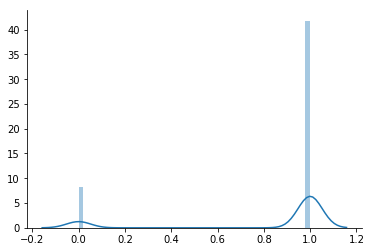

In [5]:
import sensor_env
def get_on_reward(old_state):
    individual_rewards = [sensor_env.get_reward(v) for k,v in old_state.items()]
    awake_reward = int(any(individual_rewards))
    return awake_reward
fig, ax = plt.subplots(1)
get_state = lambda run:{k:v[0:2] for k,v in run.items()}
get_rewards = lambda run: [get_on_reward(get_state(i)) for i in run]
rewards = list(itertools.chain(*[get_rewards(run) for run in agent.full_record]))
sns.distplot(rewards)
sns.despine()

In [18]:
get_just_states = lambda run: [v for i in run for k,v in i.items()]
all_states = list(itertools.chain(*[get_just_states(run) for run in agent.full_record]))
df = pd.DataFrame(all_states, columns=['status','battery','diff','time'])
df.head(5)

status  battery  diff  time
0       0      100     0     0
1       2      100     0     0
2       2      100     0     0
3       2      100     0     0
4       0       97    -3     1

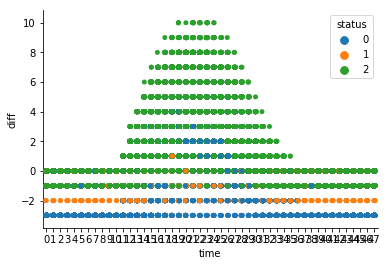

In [22]:
sns.stripplot(x="time", y="diff", hue="status",jitter=True, data=df)
sns.despine()

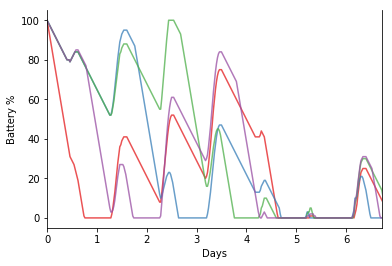

In [24]:
run=0
sensors = ['S0','S1','S2','S3']
fig, ax = plt.subplots(1)
fig.set_size_inches([6,4])
colors = ["#e41a1c","#377eb8","#4daf4a","#984ea3"]
for idx,sensor in enumerate(sensors):
    ax.plot([i[sensor][1] for i in agent.full_record[run]], color=colors[idx], alpha=0.75)
    pass
startday =0
periods = 48#in half hours 48 periods make a full day
duration =7#days
ax.set_xlim([startday*periods,(startday+duration)*periods])
ax.set_ylabel('Battery %')
ax.set_xticklabels([int(x/48) for x in ax.get_xticks()])
ax.set_xlabel('Days')
#ax2 = ax.twinx()
#just_statuses = get_status(agent.full_record[run])
#ax2.plot([any_on(i) for i in just_statuses], color='#737373', alpha=0.5)
#ax2.set_yticks([0,1])
#ax2.set_yticklabels(['Off','On'])
#ax.set_ylim([0,5])
sns.despine(top=True, right=False)
#fig.savefig('_node_solar_simulation.png', format ='png')

In [ ]:
agent.full_record[0]

In [ ]:
import multi_sensor_env
obs = {'S0': (1, 0, 0), 'S1': (2, 2, 0), 'S2': (2, 100, 0), 'S3': (2, 100, 0)}
multi_sensor_env.get_reward({k:v[0:2] for k,v in obs.items()})

In [ ]:
#agent.full_record[0]
